In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt

import itertools

import torch
from torch.utils.data import DataLoader

import kornia.geometry.conversions as conversions


from torchinfo import summary
from models import XSwinFusion 
from pose_estimation import PoseDataNPZTorch, PoseDataNPZ, PoseData, icp
from pose_estimation.utils import crop_and_resize_multiple, enumerate_symmetries, COLOR_PALETTE

WORKDIR = f"{os.getcwd()}/.."
DATA_FOLDER = os.path.join(WORKDIR, "data_folder")
DATASET_NPZ_PATH = os.path.join(DATA_FOLDER, "dataset_npz")


Presumed Preloaded NPZ Dataset: /Users/armanommid/Code/CSE/CSE275/HW2/XSwinDiffusion/../data_folder/dataset_npz


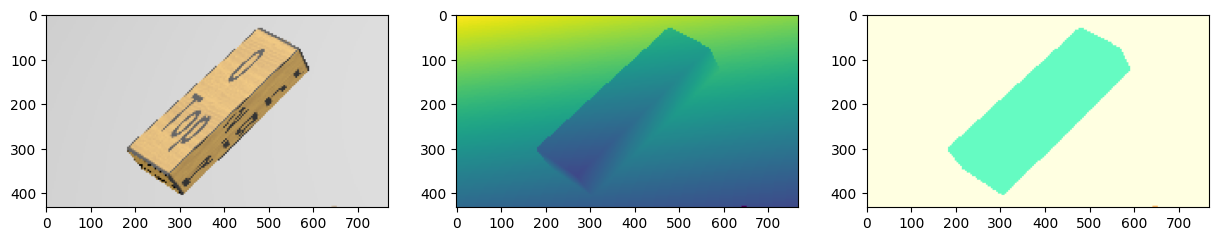

In [17]:
data = PoseDataNPZ(DATASET_NPZ_PATH)
scene = data[1, 1, 4]
rgb = scene["color"]
depth = scene["depth"]
label = scene["label"]
meta = scene["meta"]

mask = label == np.unique(label)[0]
target_size = (432, 768)
margin = 8
aspect_ratio = True
mask_fill = False

(rgb_cr, depth_cr, label_cr, mask_cr), scale, translate = crop_and_resize_multiple(
    (rgb, depth, COLOR_PALETTE[label], mask), mask, target_size=target_size, margin=margin, 
    aspect_ratio=aspect_ratio, mask_fill=mask_fill)


# print(depth[mask][:200])
# print(depth_cr[mask_cr][:200])

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(rgb_cr)
plt.subplot(1, 3, 2)
plt.imshow(depth_cr)
plt.subplot(1, 3, 3)
plt.imshow(label_cr)  # draw colorful segmentation


In [ ]:
samples = 1_000
resize = (144, 256)
aspect_ratio = True
margin = 12
feature_dims = 64
quaternion = True
pretrained = True
B = 10

model = XSwinFusion(feature_dims=feature_dims, resize=resize, 
                    quaternion=quaternion, pretrained=pretrained)

dataset = None
dataset = PoseDataNPZTorch(DATASET_NPZ_PATH, samples=samples, 
                           resize=resize, aspect_ratio=aspect_ratio, margin=margin)
dataloader = DataLoader(dataset, batch_size=B, shuffle=True)

# summary(model, depth=1)


In [ ]:
points = []

for i, (s, t, c, mi, p, sym) in enumerate(dataloader):
    print(sym.shape)


In [ ]:
objects = dataloader.dataset.data.info
for obj in objects:
    pass

sym_pad = torch.eye(3).unsqueeze(0).repeat(64, 1, 1)
s = enumerate_symmetries(objects[5]["geometric_symmetry"])
s = torch.cat(s)
print(len(s))
sym_pad[:len(s), :, :] = s
sym_pad
